# Results

---

First we will examine the patients data

### Patient Breakdown Visualizations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
def lines_that_start_with(string, fp):
    return ([line for line in fp if line.startswith(string)])

pu_08_data= lines_that_start_with('patients_of_unit', open(r'..\Data Creation\TAOR_Data_8%.txt', 'r'))[0][20:-1].split("[")
pt_08_data= lines_that_start_with('patients_of_type', open(r'..\Data Creation\TAOR_Data_8%.txt', 'r'))[0][20:-2].split("[")
pu_15_data= lines_that_start_with('patients_of_unit', open(r'..\Data Creation\TAOR_Data_15%.txt', 'r'))[0][20:-2].split("[")
pt_15_data= lines_that_start_with('patients_of_type', open(r'..\Data Creation\TAOR_Data_15%.txt', 'r'))[0][20:-2].split("[")
pu_25_data= lines_that_start_with('patients_of_unit', open(r'..\Data Creation\TAOR_Data_25%.txt', 'r'))[0][20:-2].split("[")
pt_25_data= lines_that_start_with('patients_of_type', open(r'..\Data Creation\TAOR_Data_25%.txt', 'r'))[0][20:-2].split("[")

units= str(lines_that_start_with('units', open(r'..\Data Creation\TAOR_Data_8%.txt', 'r'))[0])[9:-3]


#Clean code
def clean_list(list_l):
    new_list = []
    for item in list_l:
        item_mod = item.replace("'",'')[:-2]
        item_mod = item_mod.split(" ")
        new_list.append(item_mod)
    return(new_list)
        

#Get the nmber of patients in each list
def count_list(nested_list):
    counts=[]
    for list_l in nested_list:
        counts.append(len(list_l))
    return(counts)


pt_08_count = count_list(clean_list(pt_08_data))
pt_15_count = count_list(clean_list(pt_15_data))
pt_25_count = count_list(clean_list(pt_25_data))

pu_08_count = count_list(clean_list(pu_08_data))
pu_15_count = count_list(clean_list(pu_15_data))
pu_25_count = count_list(clean_list(pu_25_data))

<br><br>

Now that we have created the necessary lists, lets examine patients:

Text(0.5, 0.68, 'Overview of Patient by Unit')

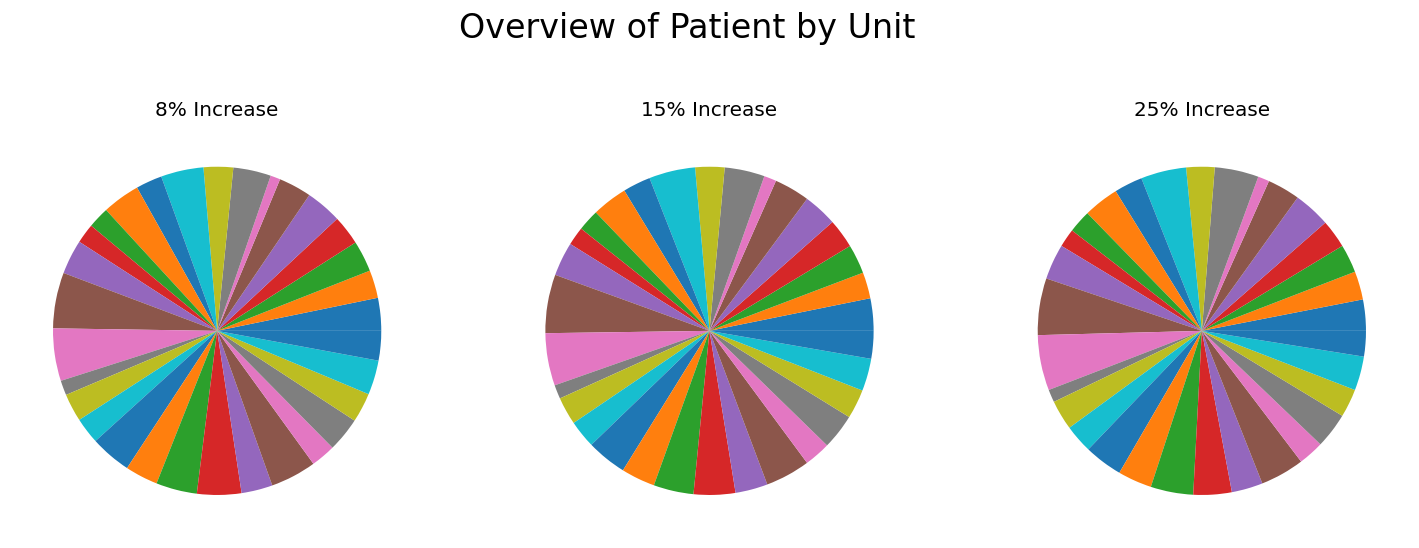

In [3]:
fig = plt.figure(figsize=(15,15),dpi=120)

ax1 = fig.add_subplot(131)
ax1.pie(pu_08_count, pctdistance=0.85)
ax1.set_title("8% Increase")

ax2 = fig.add_subplot(132)
ax2.pie(pu_15_count)
ax2.set_title("15% Increase")

ax3 = fig.add_subplot(133)
ax3.pie(pu_25_count)
ax3.set_title("25% Increase")
#ax3.legend()

fig.suptitle("Overview of Patient by Unit", y=.68, fontsize=20)

This graphic only highlights how proportional patients to unit actually is for each of the patient sets. For this reason we will not include this graphic in results. Additionally, we should only need to examine one of these sets with regards to patient type. 

Text(0.5, 0.68, 'Overview of Patient Types, Requirments, and Requests (15%)')

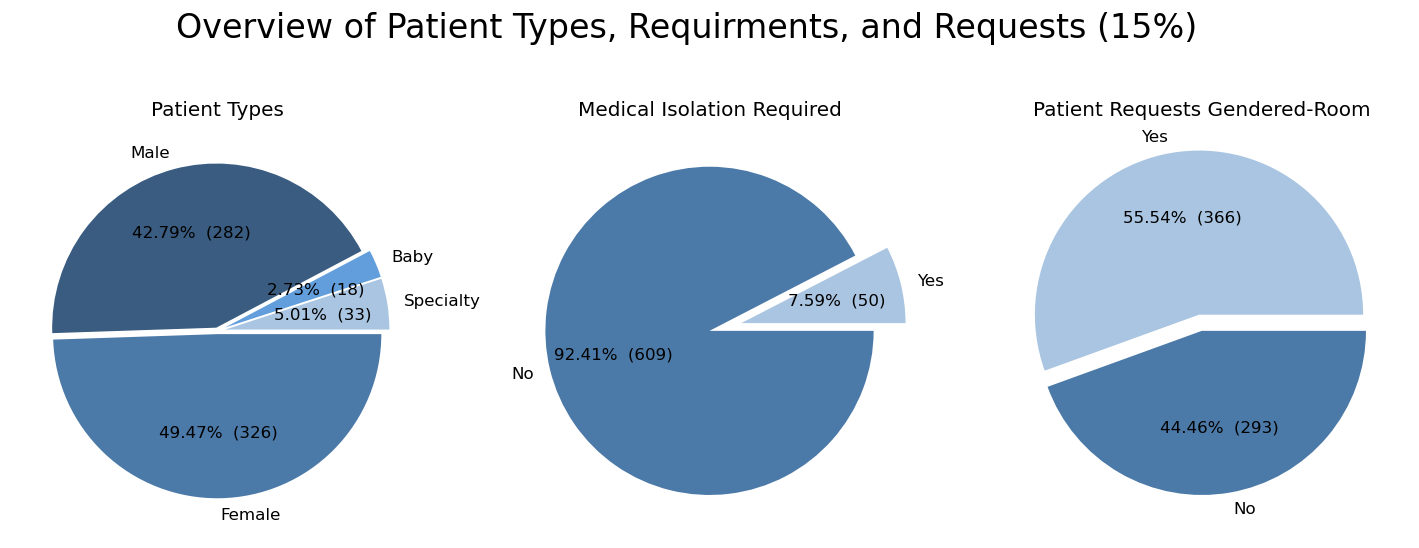

In [4]:
#Function "make_autopct" taken from: 
#https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct
#on April 5, 2022
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

#===================================================================================================#
#quickly choose which dataset to examine
model= pt_15_count 

#plot
fig = plt.figure(figsize=(15,15),dpi=120)

ax1 = fig.add_subplot(131)
ax1.pie(model[:4], labels=["Specialty", "Baby", "Male", "Female"],
       shadow = False, colors=["#A9C5E1", "#629EDB","#395C80","#4C7AA8"],
       autopct=make_autopct(model[:4]), explode=(0.05,0.05,0.02,0.02))
ax1.set_title("Patient Types")

ax2 = fig.add_subplot(132)
ax2.pie([model[4],sum(model[:4])-model[4]], shadow = False,
        labels=["Yes","No"], explode=(0.2,0), colors=["#A9C5E1","#4C7AA8"],
       autopct = make_autopct([model[4],sum(model[:4])-model[4]]))
ax2.set_title("Medical Isolation Required")

ax3 = fig.add_subplot(133)
ax3.pie([model[5],sum(model[:4])-model[5]], shadow = False,
        labels=["Yes","No"], explode=(0.1,0), colors=["#A9C5E1","#4C7AA8"],
       autopct = make_autopct([model[5],sum(model[:4])-model[5]]))
ax3.set_title("Patient Requests Gendered-Room")

fig.suptitle("Overview of Patient Types, Requirments, and Requests (15%)", y=.68, fontsize=20)


#autopct=lambda p: '{:.0f}%'.format(p * total / 100)

Note, we did not examine the results for the 8% and 15% as they are relatively proportional to 25%.

---

Now that we have examined the patients, we will visualize model results.

### Model Results Visualizations


In [5]:
#import data
i_df = pd.read_excel(r'Results.xlsx','Initial Run')
s_df = pd.read_excel(r'Results.xlsx','Standard')
m_df = pd.read_excel(r'Results.xlsx','Medium High')
h_df = pd.read_excel(r'Results.xlsx','High')

#create function to put dfs in correct format
def fix_df(df):
    #Round Total Nurses Up
    df[["Total Nurses"]] = df[["Total Nurses"]].apply(np.ceil)
    
    #Change runtime to seconds
    df[["Runtime (ms)"]] = (df[["Runtime (ms)"]]/1000).apply(lambda x: round(x,2))
    
    #Change name of runtime to reflect corrected units
    df.rename(columns={"Runtime (ms)": "Runtime (s)"}, inplace=True)

#format dfs
fix_df(i_df)
fix_df(s_df) #8%
fix_df(m_df) #15%
fix_df(h_df) #25%

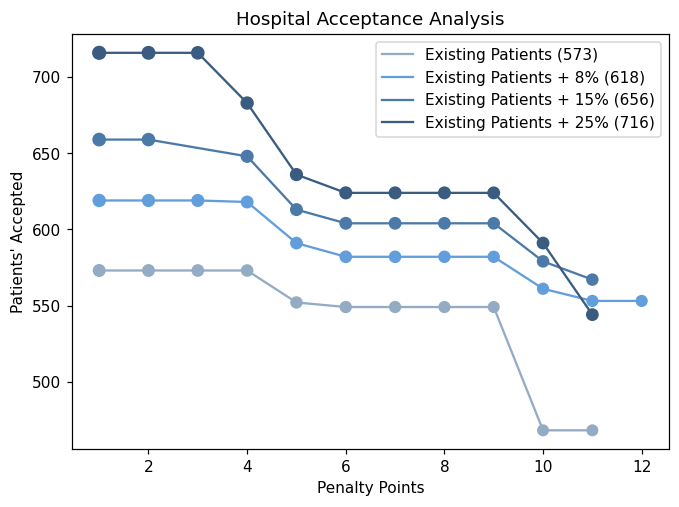

In [6]:
plt.figure(figsize=(7,5), dpi=110)
plt.scatter(i_df["Penalty parameter"], i_df["Assigned patients"], s = i_df["Objective value"]/100, color="#93ACC4")
plt.scatter(s_df["Penalty parameter"], s_df["Assigned patients"], s = s_df["Objective value"]/100, color="#629EDB")
plt.scatter(m_df["Penalty parameter"], m_df["Assigned patients"], s = m_df["Objective value"]/100, color="#4C7AA8")
plt.scatter(h_df["Penalty parameter"], h_df["Assigned patients"], s = h_df["Objective value"]/100, color="#395C80")

plt.plot(i_df["Penalty parameter"], i_df["Assigned patients"], label = "Existing Patients (573)", color="#93ACC4")
plt.plot(s_df["Penalty parameter"], s_df["Assigned patients"], label = "Existing Patients + 8% (618)", color="#629EDB")
plt.plot(m_df["Penalty parameter"], m_df["Assigned patients"], label = "Existing Patients + 15% (656)", color="#4C7AA8")
plt.plot(h_df["Penalty parameter"], h_df["Assigned patients"], label = "Existing Patients + 25% (716)", color="#395C80")

plt.title('Hospital Acceptance Analysis')
plt.xlabel('Penalty Points')
plt.ylabel("Patients' Accepted")
plt.legend()

Notice a drop in patients that can be accepted around the 4 penalty point marker. 

Due to the needs of Bath, we believe penalty points should be set to 4 as a large number of patients are still accepted and objective value is still relatively high. To understand fully, see our results section of the paper. 

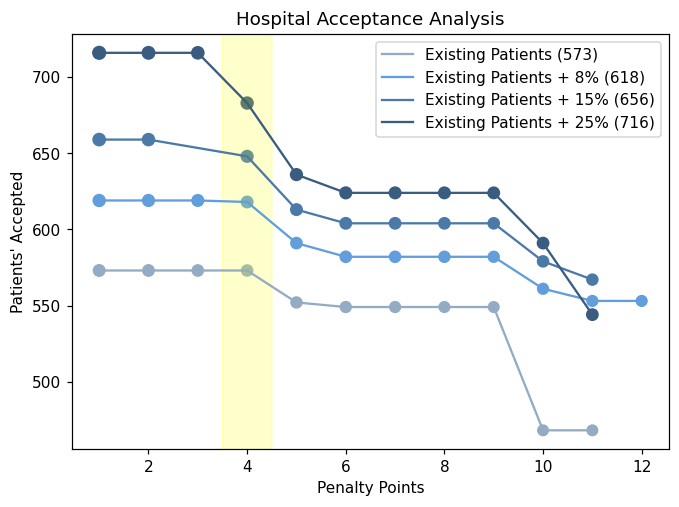

In [7]:
plt.figure(figsize=(7,5), dpi=110)
plt.scatter(i_df["Penalty parameter"], i_df["Assigned patients"], s = i_df["Objective value"]/100, color="#93ACC4")
plt.scatter(s_df["Penalty parameter"], s_df["Assigned patients"], s = s_df["Objective value"]/100, color="#629EDB")
plt.scatter(m_df["Penalty parameter"], m_df["Assigned patients"], s = m_df["Objective value"]/100, color="#4C7AA8")
plt.scatter(h_df["Penalty parameter"], h_df["Assigned patients"], s = h_df["Objective value"]/100, color="#395C80")

plt.plot(i_df["Penalty parameter"], i_df["Assigned patients"], label = "Existing Patients (573)", color="#93ACC4")
plt.plot(s_df["Penalty parameter"], s_df["Assigned patients"], label = "Existing Patients + 8% (618)", color="#629EDB")
plt.plot(m_df["Penalty parameter"], m_df["Assigned patients"], label = "Existing Patients + 15% (656)", color="#4C7AA8")
plt.plot(h_df["Penalty parameter"], h_df["Assigned patients"], label = "Existing Patients + 25% (716)", color="#395C80")

#highlight main feature
plt.axvspan(3.5, 4.5, color='yellow', alpha=0.2)


plt.title('Hospital Acceptance Analysis')
plt.xlabel('Penalty Points')
plt.ylabel("Patients' Accepted")
plt.legend()

<br><br>

### Now lets see how penalty points set to 4 perform:

Text(0.5, 0.68, 'Patient Placement Based on Penalty Point of Four (8%)')

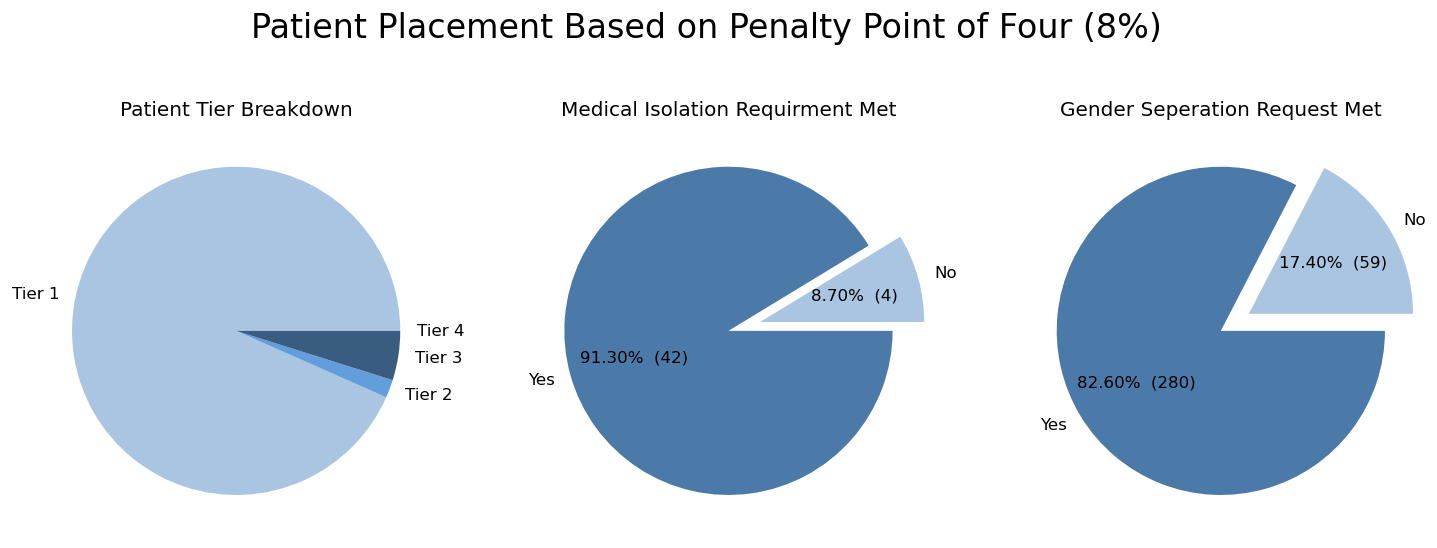

In [8]:
#quickly choose parameters to examine:
model= s_df
pat_dat = pt_08_count #necessary to compare patient_type data requests / requirements
penalty= 3 #penalty parameter is 4 which is the 3rd index  


#plot
fig = plt.figure(figsize=(15,15),dpi=120)

ax1 = fig.add_subplot(131)
ax1.pie(list(model.iloc[penalty,5:9]), labels=["Tier 1", "Tier 2", "Tier 3", "Tier 4"],
       shadow = False, colors=["#A9C5E1", "#629EDB","#395C80","#4C7AA8"])
ax1.set_title("Patient Tier Breakdown")


ax2 = fig.add_subplot(132)
ax2.pie([model.iloc[penalty,10], pat_dat[4]-model.iloc[penalty,10]], shadow = False,
        labels=["No","Yes"], explode=(0.2,0), colors=["#A9C5E1","#4C7AA8"],
       autopct = make_autopct([model.iloc[penalty,10], pat_dat[4]-model.iloc[penalty,10]]))
ax2.set_title("Medical Isolation Requirment Met")


ax3 = fig.add_subplot(133)
ax3.pie([model.iloc[penalty,11], pat_dat[5]-model.iloc[penalty,11]], shadow = False,
        labels=["No","Yes"], explode=(0.2,0), colors=["#A9C5E1","#4C7AA8"],
       autopct = make_autopct([model.iloc[penalty,11], pat_dat[5]-model.iloc[penalty,11]]))
ax3.set_title("Gender Seperation Request Met")



fig.suptitle("Patient Placement Based on Penalty Point of Four (8%)", y=.68, fontsize=20)


#autopct=lambda p: '{:.0f}%'.format(p * total / 100)

Text(0.5, 1.0, 'Baby Needs Met')

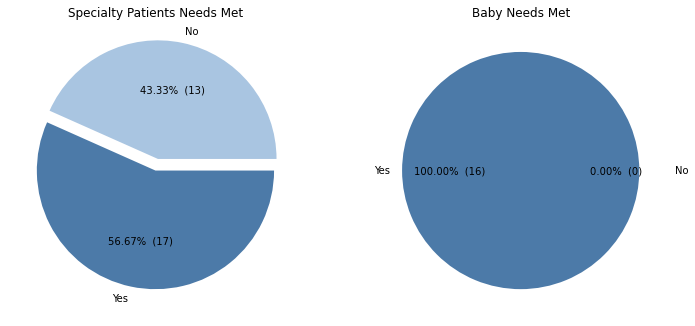

In [9]:
#Examine last two parameters
model= s_df
pat_dat = pt_08_count #necessary to compare patient_type data requests / requirements
penalty= 3 #penalty parameter is 4 which is the 3rd index  


#plot
fig = plt.figure(figsize=(12,12))#,dpi=100)

ax3 = fig.add_subplot(223)
ax3.pie([model.iloc[penalty,12], pat_dat[0]-model.iloc[penalty,12]], shadow = False,
        labels=["No","Yes"], explode=(0.1,0), colors=["#A9C5E1","#4C7AA8"],
       autopct = make_autopct([model.iloc[penalty,12], pat_dat[0]-model.iloc[penalty,12]]))
ax3.set_title("Specialty Patients Needs Met")


ax4 = fig.add_subplot(224)
ax4.pie([model.iloc[penalty,13], pat_dat[1]-model.iloc[penalty,13]], shadow = False,
        labels=["No","Yes"], explode=(0.2,0), colors=["#A9C5E1","#4C7AA8"],
       autopct = make_autopct([model.iloc[penalty,13], pat_dat[1]-model.iloc[penalty,13]]))
ax4.set_title("Baby Needs Met")


<br><br><br>

Now, Lets Examine Nurses 

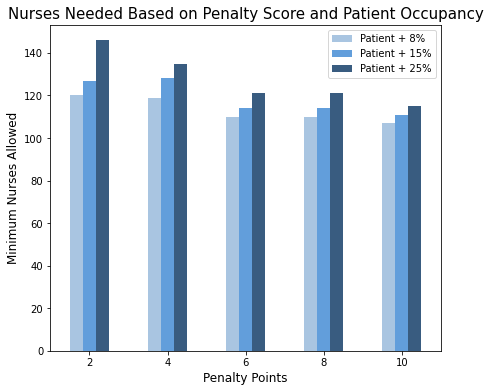

In [10]:
labels = list(range(11)) #penalty points
s_nurse = s_df["Total Nurses"].values.tolist()[:-1]
m_nurse = m_df["Total Nurses"].values.tolist()
m_nurse.insert(2, np.nan) #note m_df is missing value for m
h_nurse = h_df["Total Nurses"].values.tolist()

nurse_df = pd.DataFrame({'Patient + 8%': s_nurse[1::2], 'Patient + 15%': m_nurse[1::2], 'Patient + 25%': h_nurse[1::2]}, index=[2,4,6,8,10])

#Set plot parameters
plt.rcParams['figure.figsize'] = [7, 6]
plt.rc('axes', labelsize=12)
plt.rc('axes', titlesize=15)

#Plot
ax = nurse_df.plot.bar(rot=0, color=["#A9C5E1", "#629EDB","#395C80"])
ax.set_ylabel('Minimum Nurses Allowed')
ax.set_xlabel('Penalty Points')
ax.set_title('Nurses Needed Based on Penalty Score and Patient Occupancy')

plt.show()

<br><br>

---


### Finally, lets examine overall model performance

In [11]:
#change decimals to 2
pd.set_option('display.float_format', lambda x: '%.2f' % x)

i_df.describe()[1:]

,Penalty parameter,Assigned patients,Objective value,Total Nurses,Runtime (s),Tier 1,Tier 2,Tier 3,Tier 4,Unit Discrepancy,Unfulfiled isolation requests,Unfulfiled gender separation requests,Unfulfiled special bed requests,Unfulfiled baby bed requests
mean,6.00,543.27,5055.00,103.55,38.21,528.55,6.45,8.27,0.00,0.73,3.55,41.45,10.55,0.00
std,3.32,38.83,318.47,6.55,6.67,29.95,3.67,11.14,0.00,2.41,2.02,20.52,5.37,0.00
min,1.00,468.00,4680.00,92.00,27.86,468.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,3.50,549.00,4801.50,103.00,33.92,541.00,7.00,0.00,0.00,0.00,3.00,49.00,11.00,0.00
50%,6.00,549.00,5004.00,103.00,39.25,542.00,7.00,0.00,0.00,0.00,4.00,51.00,12.00,0.00
75%,8.50,573.00,5278.50,109.00,43.75,542.00,7.00,20.00,0.00,0.00,4.50,51.00,14.00,0.00
max,11.00,573.00,5601.00,112.00,46.86,544.00,13.00,24.00,0.00,8.00,6.00,52.00,15.00,0.00


In [12]:
s_df.describe()[1:]

,Penalty parameter,Assigned patients,Objective value,Total Nurses,Runtime (s),Tier 1,Tier 2,Tier 3,Tier 4,Unit Discrepancy,Unfulfiled isolation requests,Unfulfiled gender separation requests,Unfulfiled special bed requests,Unfulfiled baby bed requests
mean,6.50,588.42,5316.25,112.50,61.13,568.17,8.92,11.08,0.25,1.58,4.25,53.58,10.42,0.00
std,3.61,25.43,395.32,5.54,19.82,12.12,1.83,14.95,0.45,2.43,0.87,8.27,1.98,0.00
min,1.00,553.00,4822.00,106.00,33.88,546.00,7.00,0.00,0.00,0.00,3.00,39.00,6.00,0.00
25%,3.75,576.75,5006.00,109.25,53.27,568.75,8.00,0.00,0.00,0.00,3.75,53.00,9.75,0.00
50%,6.50,582.00,5248.00,110.00,59.12,574.00,8.00,0.00,0.00,0.00,4.50,57.50,11.00,0.00
75%,9.25,618.25,5580.25,119.00,65.06,575.00,10.25,30.00,0.25,3.50,5.00,58.00,12.00,0.00
max,12.00,619.00,6027.00,120.00,115.52,577.00,12.00,33.00,1.00,6.00,5.00,61.00,13.00,0.00


In [13]:
m_df.describe()[1:]

,Penalty parameter,Assigned patients,Objective value,Total Nurses,Runtime (s),Tier 1,Tier 2,Tier 3,Tier 4,Unit Discrepancy,Unfulfiled isolation requests,Unfulfiled gender separation requests,Unfulfiled special bed requests,Unfulfiled baby bed requests
mean,6.30,614.10,5584.40,117.50,58.46,595.30,5.90,10.70,2.20,3.00,4.20,52.80,12.70,0.00
std,3.33,31.69,418.71,7.00,8.99,13.62,4.56,15.45,4.64,4.90,0.92,9.80,1.25,0.00
min,1.00,567.00,5131.00,110.00,37.92,563.00,1.00,0.00,0.00,0.00,3.00,28.00,11.00,0.00
25%,4.25,604.00,5287.50,114.00,57.17,600.00,3.25,0.00,0.00,0.00,4.00,56.25,12.00,0.00
50%,6.50,604.00,5481.00,114.00,58.83,600.50,4.00,0.00,0.00,0.00,4.00,57.00,13.00,0.00
75%,8.75,639.25,5740.50,124.25,61.37,602.00,10.00,24.75,0.00,6.75,4.75,57.00,13.00,0.00
max,11.00,659.00,6383.00,128.00,70.84,605.00,13.00,34.00,11.00,12.00,6.00,58.00,15.00,0.00


In [14]:
h_df.describe()[1:]

,Penalty parameter,Assigned patients,Objective value,Total Nurses,Runtime (s),Tier 1,Tier 2,Tier 3,Tier 4,Unit Discrepancy,Unfulfiled isolation requests,Unfulfiled gender separation requests,Unfulfiled special bed requests,Unfulfiled baby bed requests
mean,6.00,645.27,5910.55,127.55,89.72,615.36,6.73,18.55,4.64,13.00,3.45,50.09,10.18,0.00
std,3.32,56.15,474.77,12.90,24.21,26.12,8.59,24.03,7.98,16.46,1.63,18.39,3.68,0.00
min,1.00,544.00,5440.00,110.00,44.19,544.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,3.50,624.00,5560.00,121.00,75.40,623.00,1.00,0.00,0.00,3.00,2.50,52.00,10.50,0.00
50%,6.00,624.00,5760.00,121.00,97.48,623.00,1.00,0.00,0.00,3.00,4.00,55.00,11.00,0.00
75%,8.50,699.50,6153.50,139.50,104.10,628.00,15.00,44.50,7.50,25.00,5.00,60.00,12.00,0.00
max,11.00,716.00,6863.00,146.00,128.62,631.00,22.00,54.00,18.00,43.00,5.00,63.00,13.00,0.00


In [15]:
#examine overall runtime
runtimes = list(i_df.loc[:,"Runtime (s)"])+list(s_df.loc[:,"Runtime (s)"])+list(m_df.loc[:,"Runtime (s)"])+list(h_df.loc[:,"Runtime (s)"])
obj_val = list(i_df.loc[:,"Objective value"])+list(s_df.loc[:,"Objective value"])+list(m_df.loc[:,"Objective value"])+list(h_df.loc[:,"Objective value"])

pd.DataFrame(zip(runtimes,obj_val), columns=["runtime (s)","obj val"]).describe()[1:]

,runtime (s),obj val
mean,61.94,5460.45
std,24.67,505.90
min,27.86,4680.00
25%,43.86,5108.25
50%,58.83,5439.00
75%,69.18,5715.75
max,128.62,6863.00


In [16]:
#examine results of the 4 parameter
pd.DataFrame(zip(i_df.iloc[3],s_df.iloc[3],m_df.iloc[2],h_df.iloc[3]), index=h_df.columns).T.describe()[1:]

,Penalty parameter,Assigned patients,Objective value,Total Nurses,Runtime (s),Tier 1,Tier 2,Tier 3,Tier 4,Unit Discrepancy,Unfulfiled isolation requests,Unfulfiled gender separation requests,Unfulfiled special bed requests,Unfulfiled baby bed requests
mean,4.00,630.50,5644.00,123.50,81.94,589.25,12.50,28.75,0.00,10.25,4.50,57.75,13.25,0.00
std,0.00,46.64,351.45,10.08,31.47,37.37,1.00,9.50,0.00,4.03,1.29,4.57,2.36,0.00
min,4.00,573.00,5214.00,112.00,44.78,544.00,11.00,16.00,0.00,6.00,3.00,52.00,10.00,0.00
25%,4.00,606.75,5458.50,117.25,62.67,568.75,12.50,26.50,0.00,7.50,3.75,55.75,12.25,0.00
50%,4.00,633.00,5662.00,123.50,83.73,591.00,13.00,30.00,0.00,10.00,4.50,58.00,14.00,0.00
75%,4.00,656.75,5847.50,129.75,103.00,611.50,13.00,32.25,0.00,12.75,5.25,60.00,15.00,0.00
max,4.00,683.00,6038.00,135.00,115.52,631.00,13.00,39.00,0.00,15.00,6.00,63.00,15.00,0.00
